##  Malaria Diagnosis
-  Task
- Data    (From Tensorflow datasets)
- Modelling (CNN)
- Error Sanctioning
- Training and Optimization
- Performance   Measurement
- Validation and testing
- Corrective measures

### Task
 we have a segment of cell we have to tell whether it is parasitized or unparasitized

## Dataset Preparation

In [71]:
### Importing libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from keras.src.ops import dtype
from pandas.io.sas.sas_constants import dataset_length
from tensorflow_datasets.core import dataset_info
from tensorflow.keras.layers  import Conv2D, MaxPool2D,Dense,Flatten,FlaxLayer
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [72]:
ds,ds_info=tfds.load('malaria',with_info=True,as_supervised=True, shuffle_files=True,split=['train'])
print(ds)
print(ds_info)

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]
tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='C:\\Users\\wajah\\tensorflow_datasets\\malaria\\1.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{raja

In [73]:
for data in ds[0].take(1):
    print(data)

(<tf.Tensor: shape=(145, 148, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


In [74]:
Train_Ratio=0.8
Val_Ratio=0.1
Test_Ratio=0.1
dataset=tf.data.Dataset.range(10)
print(list(dataset.as_numpy_iterator()))
dataset_length=len(dataset)

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


In [75]:
train_dataset=dataset.take(int(Train_Ratio*dataset_length))
# print(train_dataset)
print(list(train_dataset.as_numpy_iterator()))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]


In [76]:
val_test_dataset=dataset.skip(int(Train_Ratio*dataset_length))
print(list(val_test_dataset.as_numpy_iterator()))
val_dataset=val_test_dataset.take(int(Val_Ratio*dataset_length))
print(list(val_dataset.as_numpy_iterator()))

[np.int64(8), np.int64(9)]
[np.int64(8)]


In [77]:
test_dataset=val_test_dataset.skip(int(Val_Ratio*dataset_length))
print(list(test_dataset.as_numpy_iterator()))

[np.int64(9)]


In [78]:
def splits(dataset,Train_Ratio,Val_Ratio,Test_Ratio):

    dataset_length=len(dataset)

    train_dataset=dataset.take(int(Train_Ratio*dataset_length))

    val_test_dataset=dataset.skip(int(Train_Ratio*dataset_length))
    val_dataset=val_test_dataset.take(int(Val_Ratio*dataset_length))

    test_dataset=val_test_dataset.skip(int(Val_Ratio*dataset_length))
    return train_dataset,val_dataset,test_dataset

In [79]:
TrainRatio=0.6
ValRatio=0.2
TestRatio=0.2

dataset=tf.data.Dataset.range(10)

TR,VD,TED=splits(dataset,TrainRatio,ValRatio,TestRatio)
print(list(TR.as_numpy_iterator()), list(VD.as_numpy_iterator()), list(TED.as_numpy_iterator()))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)] [np.int64(6), np.int64(7)] [np.int64(8), np.int64(9)]


### Now test this function in dataset

In [80]:
train_dataset,val_dataset,test_dataset=splits(ds[0],TrainRatio, ValRatio, TestRatio)
print(list(test_dataset.take(1).as_numpy_iterator()),list(val_dataset.take(1).as_numpy_iterator()),list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), np.int64(0))] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0,

###  Data Visulization

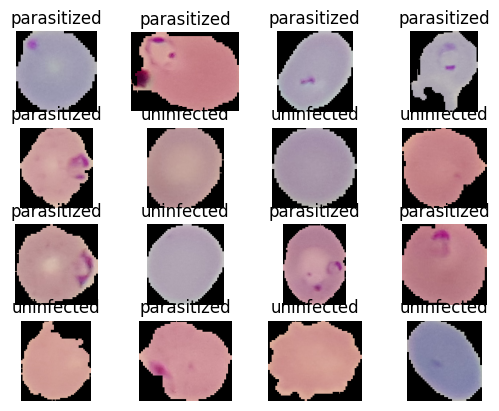

In [81]:
for i, (img, label) in enumerate(train_dataset.take(16)):
    ax = plt.subplot(4, 4, i + 1)
    imshow = plt.imshow(img)
    plt.axis('off')
    plt.title(ds_info.features['label'].int2str(label))

Text(0.5, 1.0, 'parasitized')

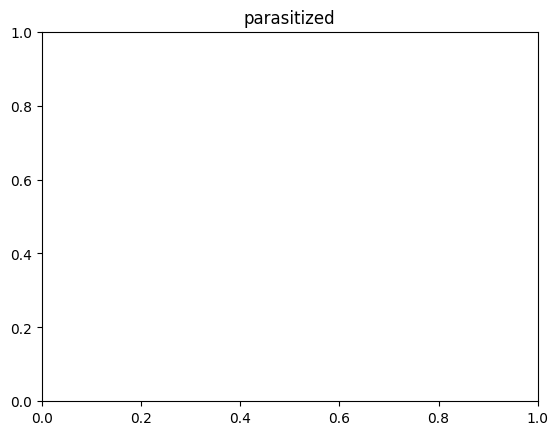

In [82]:
plt.title(ds_info.features['label'].int2str(0))

## Data Preprocessing
- resize the image
- normalize the image
    - we have two techniques
        - Standarization x=(x-Mu)/standard deviation
        - Normalization  z=(x-xmin)/(xmax-xmin)
                - we choose normalization

In [83]:
im_Size=224
def resizing(image,label):
    return tf.image.resize(image,[im_Size,im_Size]),label

In [84]:
train_dataset=train_dataset.map(resizing)
val_dataset=val_dataset.map(resizing)
test_dataset=test_dataset.map(resizing)
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [85]:
for img,label in train_dataset.take(16):
    print(img,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0

In [86]:
##  Scalling
im_Size=224
def resize_rescale(image,label):
    return tf.image.resize(image,[im_Size,im_Size])/255,label

In [87]:
train_dataset=train_dataset.map(resize_rescale)

In [88]:
for  img,label in train_dataset.take(16):
    print(img,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0

In [89]:
BATCH_SIZE=32
train_dataset=train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [90]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [91]:
val_dataset = val_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [92]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

##  How and why convnets work?
Convolutional Neural Networks (CNNs) are a type of deep learning model that has following components
- inputs
- filters/kernel
- padding
- strides

In [93]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(im_Size, im_Size, 3)),

    tf.keras.layers.Conv2D(filters=6, kernel_size=5,
                           strides=1, padding="valid", activation='sigmoid'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),  # Added comma

    tf.keras.layers.Conv2D(filters=6, kernel_size=5,
                           strides=1, padding="valid", activation='sigmoid'),
    # tf.keras.layers.MaxPool2D(pool_size=(
    #     2, 2), strides=2),  # Added pooling layer

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    # Changed to 'softmax' for better classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

e:\AI 2025\CV\TensorFlow_for_CV\myenv\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 220, 220, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 110, 110, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 106, 106, 6)    │           906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 67416)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │     6,741,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,744,083 (25.73 MB)

 Trainable params: 6,744,083 (25.73 MB)

 Non-trainable params: 0 (0.00 B)

## Binary cross entropy loss

In [94]:
y_true=[0,1,0,0]
y_pred=[0.6,0.51,0.94,1]
bce=tf.keras.losses.BinaryCrossentropy()
bce(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=5.086357593536377>

In [95]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=BinaryCrossentropy()
)

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=100, verbose=1)

Epoch 1/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 114s 217ms/step - loss: 0.6965 - val_loss: 0.6931
Epoch 2/100
238/517 ━━━━━━━━━━━━━━━━━━━━ 58s 210ms/step - loss: 0.6941